In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('Sanitation.csv')
data

,ULB Name,Public Toilets,Community Toilets,She Toilets,ODF Declared Wards,ODF Non Declared Wards,Compost Yard Location & Extent (Acrs),Dry Resourse Collection Center (Yes/No),% of Door to Door Collection,Tractors,Autos,Tricycles,Pushcarts,Regular Workers,Out Sourced Workers,Government Hospitals,Private Hospitals,Urban Health Centres,Garbage generation/day (Mts),Garbage lifted/day (Mts)
0,Adilabad,8.0,NaN,NaN,36,0,36.20,YES,100.0,12,18,5,30,52,200,1,13,4,66.0,64.0
1,Andol-Jogipet,NaN,NaN,NaN,10,10,3.27,YES,89.0,1,0,12,3,11,37,1,5,0,4.7,3.9
2,Armoor,4.0,NaN,NaN,23,0,11.09,YES,100.0,5,10,0,0,17,67,1,25,0,32.0,30.0
3,Atchampet,NaN,NaN,NaN,20,0,0.00,NO,85.0,9,0,5,0,2,74,2,8,0,14.0,14.0
4,Badangpet,NaN,NaN,NaN,20,0,0.00,YES,100.0,4,30,15,0,0,168,1,3,0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Vikarabad,3.0,NaN,NaN,28,0,10.01,YES,95.0,3,11,0,0,23,105,3,17,0,25.0,25.0
68,Wanaparthy,NaN,NaN,NaN,13,13,0.00,NO,84.0,11,0,0,2,17,110,1,8,2,32.0,32.0
69,Warangal,1.0,NaN,NaN,0,58,0.00,NaN,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0
70,Yellandu,NaN,NaN,NaN,22,2,5.00,NO,89.0,4,2,8,24,34,56,1,5,0,32.0,30.0


In [16]:
odf_data=pd.read_csv('Sanitation.csv',usecols=['ULB Name','ODF Declared Wards','ODF Non Declared Wards'])
odf_data

,ULB Name,ODF Declared Wards,ODF Non Declared Wards
0,Adilabad,36,0
1,Andol-Jogipet,10,10
2,Armoor,23,0
3,Atchampet,20,0
4,Badangpet,20,0
...,...,...,...
67,Vikarabad,28,0
68,Wanaparthy,13,13
69,Warangal,0,58
70,Yellandu,22,2


In [7]:
odf_data.shape



(72, 3)

In [8]:
odf_data.size



216

In [52]:
odf_data.head()

,ULB Name,ODF Declared Wards,ODF Non Declared Wards
0,Adilabad,36,0
1,Andol-Jogipet,10,10
2,Armoor,23,0
3,Atchampet,20,0
4,Badangpet,20,0


In [18]:
odf_data.describe()

,ODF Declared Wards,ODF Non Declared Wards
count,72.000000,72.000000
mean,23.291667,3.958333
std,10.864644,10.161287
min,0.000000,0.000000
25%,20.000000,0.000000
50%,20.000000,0.000000
75%,30.250000,0.000000
max,50.000000,58.000000


In [17]:
#maximum non declared wards are more than odf declared wards
#lets check which are those wards


odf = pd.DataFrame(odf_data, columns=['ULB Name', 'ODF Declared Wards', 'ODF Non Declared Wards'])

odf['non_odf'] = np.where((odf['ODF Non Declared Wards'] >= odf['ODF Declared Wards'])
                     , odf['ULB Name'], np.nan)

odf['non_odf'].dropna()

1     Andol-Jogipet
20            Ieeja
26       Kagaznagar
28        Kamareddy
36      Mahabubabad
47         Nalgonda
50           Nirmal
65           Tandur
68       Wanaparthy
69         Warangal
Name: non_odf, dtype: object

In [59]:
odf_data['ODF Declared Wards'].equals(odf_data['ODF Non Declared Wards'])
#here we can see that there is atleast one city that  has no same number of odf declared and non declared wards

False

In [60]:
#now let's check where non declared wards are strictly greater than declared wards in a city
odf['non_odf'] = np.where((odf['ODF Non Declared Wards'] > odf['ODF Declared Wards'])
                     , odf['ULB Name'], np.nan)

odf['non_odf'].dropna()

20          Ieeja
26     Kagaznagar
28      Kamareddy
36    Mahabubabad
47       Nalgonda
50         Nirmal
65         Tandur
69       Warangal
Name: non_odf, dtype: object

In [61]:
#we can also check where odf declared and non declared wards are same in number
odf['non_odf'] = np.where((odf['ODF Non Declared Wards'] == odf['ODF Declared Wards'])
                     , odf['ULB Name'], np.nan)

odf['non_odf'].dropna()

1     Andol-Jogipet
68       Wanaparthy
Name: non_odf, dtype: object

In [63]:
#where odf declared wards are greater than non declared wards
odf['non_odf'] = np.where((odf['ODF Declared Wards'] > odf['ODF Non Declared Wards'])
                     , odf['ULB Name'], np.nan)

odf['non_odf'].dropna()

0       Adilabad
2         Armoor
3      Atchampet
4      Badangpet
5      Badepally
         ...    
64      Suryapet
66    Vemulavada
67     Vikarabad
70      Yellandu
71    Zaheerabad
Name: non_odf, Length: 62, dtype: object

In [67]:
#check where odf non declared wards are zero in  a city
odf['non_odf0'] = np.where((odf['ODF Non Declared Wards']==0) & (odf['ODF Declared Wards']>0)
                     ,odf['ULB Name'], np.nan)

odf['non_odf0'].dropna()

0           Adilabad
2             Armoor
3          Atchampet
4          Badangpet
5          Badepally
6        Bellampalle
7            Bhainsa
8            Bhongir
9       Bhupalapally
10            Bodhan
11          Boduppal
12       Devarakonda
13           Dubbaka
14            Gadwal
15            Gajwel
16          Husnabad
17         Huzurabad
18        Huzurnagar
19     Ibrahimpatnam
21           Jagtial
24          Jelpally
25        Jillelguda
27       Kalwakurthy
30           Khammam
31            Kodada
32          Kollapur
33           Korutla
35           Madhira
37      Mahabubnagar
38        Mancherial
39        Mandamarri
41             Medak
42           Medchal
43           Meerpet
44          Metpally
45       Miryalaguda
46      Nagarkurnool
48         Narasmpet
49        Narayanpet
51         Nizamabad
53          Parakala
54    Pedda Amberpet
55        Peddapalli
56      Peerzadiguda
57        Ramagundam
58        Sadasivpet
59        Sangareddy
60         Sa

In [68]:
#check which cities have no odf declared wards
odf['non_odf0'] = np.where((odf['ODF Declared Wards']==0) & (odf['ODF Non Declared Wards']>0)
                     ,odf['ULB Name'], np.nan)

odf['non_odf0'].dropna()

20        Ieeja
28    Kamareddy
69     Warangal
Name: non_odf0, dtype: object

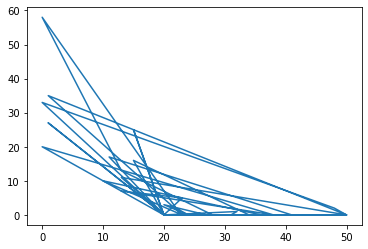

In [18]:
from matplotlib import pyplot as plt

plt.plot(odf['ODF Declared Wards'] ,odf['ODF Non Declared Wards'])
  
# function to show the plot
plt.show()

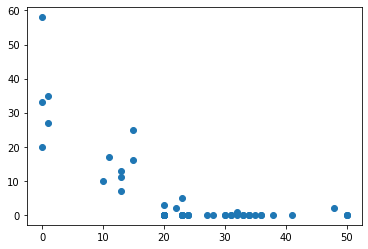

In [12]:
plt.scatter(odf['ODF Declared Wards'] ,odf['ODF Non Declared Wards'])
  
# function to show the plot
plt.show()

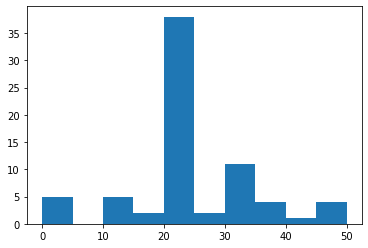

In [75]:
plt.hist(odf['ODF Declared Wards'])
  
# function to show the plot
plt.show()

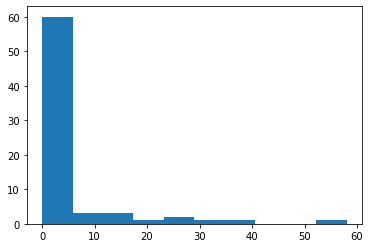

In [13]:
plt.hist(odf['ODF Non Declared Wards'])
  
# function to show the plot
plt.show()


In [19]:
del odf['non_odf']
odf

,ULB Name,ODF Declared Wards,ODF Non Declared Wards
0,Adilabad,36,0
1,Andol-Jogipet,10,10
2,Armoor,23,0
3,Atchampet,20,0
4,Badangpet,20,0
...,...,...,...
67,Vikarabad,28,0
68,Wanaparthy,13,13
69,Warangal,0,58
70,Yellandu,22,2


Text(0, 0.5, 'Number of Wards')

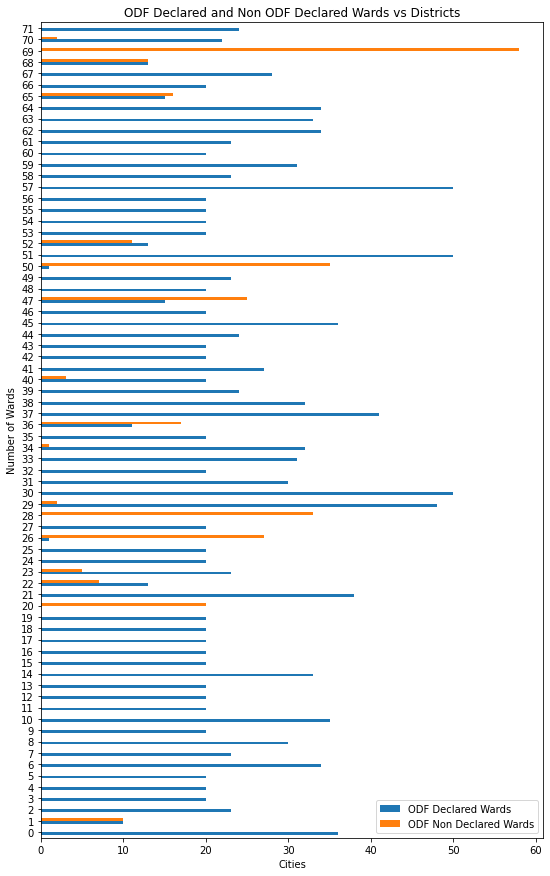

In [50]:
odf.plot(kind='barh',figsize=[9,15])
plt.title('ODF Declared and Non ODF Declared Wards vs Districts')
plt.xlabel("Cities") 
plt.ylabel("Number of Wards")

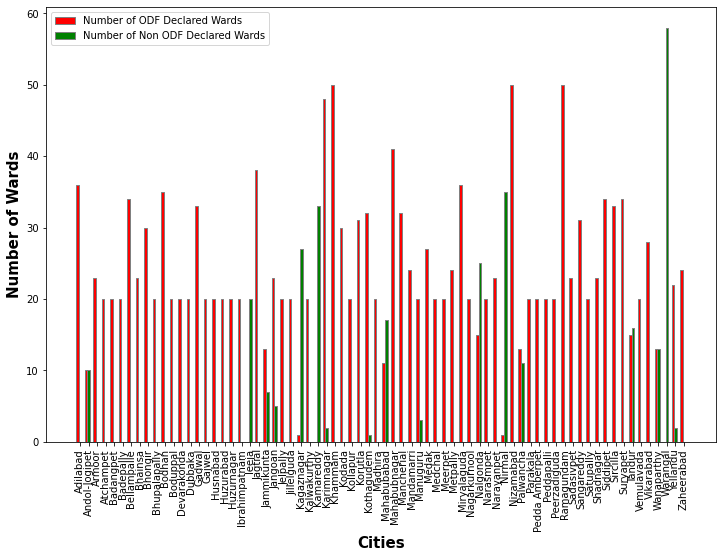

In [49]:
barWidth=0.3

br1=np.arange(len(y_values1))
br2=[x + barWidth for x in br1]
plt.figure(figsize=(12,8))
plt.bar(br1,y_values1,color='r',width=barWidth,align='center',edgecolor='grey',label='Number of ODF Declared Wards')
plt.bar(br2,y_values2,color='g',width=barWidth,align='center',edgecolor='grey',label='Number of Non ODF Declared Wards')
plt.xlabel('Cities',fontweight='bold',fontsize=15)
plt.ylabel('Number of Wards',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(y_values1))],x_values,rotation=90)
plt.legend()
plt.show()

In [7]:
#working on toilets section
tol_data=pd.read_csv('Sanitation.csv',usecols=['ULB Name','Public Toilets','Community Toilets','She Toilets'])
tol_data

,ULB Name,Public Toilets,Community Toilets,She Toilets
0,Adilabad,8.0,NaN,NaN
1,Andol-Jogipet,NaN,NaN,NaN
2,Armoor,4.0,NaN,NaN
3,Atchampet,NaN,NaN,NaN
4,Badangpet,NaN,NaN,NaN
...,...,...,...,...
67,Vikarabad,3.0,NaN,NaN
68,Wanaparthy,NaN,NaN,NaN
69,Warangal,1.0,NaN,NaN
70,Yellandu,NaN,NaN,NaN


In [66]:
tol_data.shape


(72, 4)

In [67]:
tol_data.size

288

In [68]:
tol_data.head()

,ULB Name,Public Toilets,Community Toilets,She Toilets
0,Adilabad,8.0,NaN,NaN
1,Andol-Jogipet,NaN,NaN,NaN
2,Armoor,4.0,NaN,NaN
3,Atchampet,NaN,NaN,NaN
4,Badangpet,NaN,NaN,NaN


In [69]:
tol_data.describe()

,Public Toilets,Community Toilets,She Toilets
count,31.000000,13.000000,10.000000
mean,3.419355,1.538462,1.300000
std,3.253451,1.853617,0.483046
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000
75%,4.000000,2.000000,1.750000
max,16.000000,7.000000,2.000000


In [8]:
tol = pd.DataFrame(tol_data, columns=['ULB Name', 'Public Toilets','Community Toilets','She Toilets'])
tol.dropna()
#ULB which has atleast one pulic,community,she toilets

,ULB Name,Public Toilets,Community Toilets,She Toilets
56,Peerzadiguda,1.0,1.0,1.0


In [9]:
tolfilled0=tol.fillna(0)
tolfilled0

,ULB Name,Public Toilets,Community Toilets,She Toilets
0,Adilabad,8.0,0.0,0.0
1,Andol-Jogipet,0.0,0.0,0.0
2,Armoor,4.0,0.0,0.0
3,Atchampet,0.0,0.0,0.0
4,Badangpet,0.0,0.0,0.0
...,...,...,...,...
67,Vikarabad,3.0,0.0,0.0
68,Wanaparthy,0.0,0.0,0.0
69,Warangal,1.0,0.0,0.0
70,Yellandu,0.0,0.0,0.0


In [34]:
tolfilled0['calculate'] = np.where((tolfilled0['Public Toilets'] > 0)|(tolfilled0['Community Toilets']>0)|(tolfilled0['She Toilets']>0)
                     , tolfilled0['ULB Name'], np.nan)

tol_1=tolfilled0['calculate'].dropna()
#atleast one toilet

In [41]:
tolfilled0['calculate'] = np.where((tolfilled0['Public Toilets'] > tolfilled0['Community Toilets'])&(tolfilled0['Public Toilets']>tolfilled0['She Toilets'])
                     , tolfilled0['ULB Name'], np.nan)

tol1=tolfilled0['calculate'].dropna()
#ulb's with more no.of public toilets than other two

In [36]:
#ulbs which have none of them
tolfilled0['calculate'] = np.where((tolfilled0['Public Toilets'] ==0)&(tolfilled0['She Toilets']==0)&(tolfilled0['Community Toilets']==0)
                     , tolfilled0['ULB Name'], np.nan)

tol0=tolfilled0['calculate'].dropna()
tol0

1     Andol-Jogipet
3         Atchampet
4         Badangpet
6       Bellampalle
8           Bhongir
10           Bodhan
12      Devarakonda
13          Dubbaka
14           Gadwal
16         Husnabad
17        Huzurabad
18       Huzurnagar
19    Ibrahimpatnam
20            Ieeja
21          Jagtial
22       Jammikunta
23          Jangoan
26       Kagaznagar
28        Kamareddy
29       Karimnagar
31           Kodada
34       Kothagudem
35          Madhira
36      Mahabubabad
37     Mahabubnagar
39       Mandamarri
44         Metpally
46     Nagarkurnool
49       Narayanpet
53         Parakala
59       Sangareddy
60        Satupally
61        Shadnagar
68       Wanaparthy
70         Yellandu
71       Zaheerabad
Name: calculate, dtype: object

In [43]:
tolfilled0['calculate'] = np.where((tolfilled0['Community Toilets'] > tolfilled0['Public Toilets'])&(tolfilled0['Community Toilets']>tolfilled0['She Toilets'])
                     , tolfilled0['ULB Name'], np.nan)

tol2=tolfilled0['calculate'].dropna()
#ulb's with more no.of community toilets than other two

In [35]:
tolfilled0['calculate'] = np.where((tolfilled0['She Toilets'] > tolfilled0['Public Toilets'])&(tolfilled0['She Toilets']>tolfilled0['Community Toilets'])
                     , tolfilled0['ULB Name'], np.nan)

tol3=tolfilled0['calculate'].dropna()
#ulb's with more no.of community toilets than other two

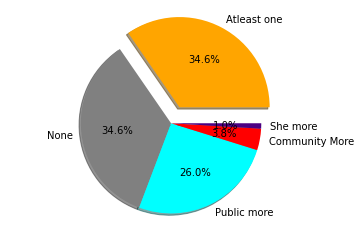

In [63]:
fields=['Atleast one','None','Public more','Community More','She more']
data=np.array([len(tol_1),len(tol0),len(tol1),len(tol2),len(tol3)])
colors=["orange","grey","cyan","red","indigo"]
'''colors=["orange","grey","cyan","beige","indigo"]
wp={'linewidth':1,'edgecolor':"black"}
def func(pct,allvalues):
    absolute=int(pct / 100.*np.sum(allvalues))
    return "{:.1f}\n({:d} g)".format(pct,absolute)
fig,ax=plt.subplots(figsize=(10,7))
myexplode=[0.2,0,0,0,0]
wedges,texts,autotexts=ax.pie(data,
                             autopct=lambda pct:func(pct,data),
                             labels=fields),explode=myexplode,shadow=True,colors=colors,startangle=90,wedgeprops=wp,textprops=dict(color="magenta")
                             '''
myexplode=[0.2,0,0,0,0]
fig,ax=plt.subplots()
ax.pie(data,labels=fields,explode=myexplode,autopct='%1.1f%%',shadow=True,colors=colors)
#plt.pie(data,labels=fields,explode=myexplode,shadow=True,colors=colors)
ax.axis('equal')
plt.show()

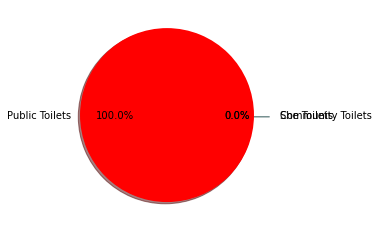

In [12]:
#we can get a vizualization for every ULB by just changing the index of iloc[here] to get for 
#other ULBS 
fields=['Public Toilets','Community Toilets','She Toilets']
data=np.array([tolfilled0.iloc[0]['Public Toilets'],tolfilled0.iloc[0]['Community Toilets'],tolfilled0.iloc[0]['She Toilets']])
colors=["red","grey","cyan"]
myexplode=[0.2,0,0]
fig,ax=plt.subplots()
ax.pie(data,labels=fields,explode=myexplode,autopct='%1.1f%%',shadow=True,colors=colors)
#plt.pie(data,labels=fields,explode=myexplode,shadow=True,colors=colors)
#ax.axis('equal')
plt.show()

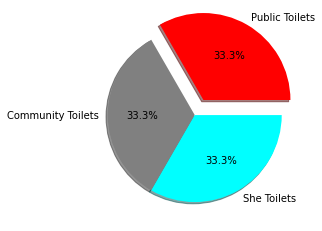

In [21]:
fields=['Public Toilets','Community Toilets','She Toilets']
data=np.array([tolfilled0.iloc[56]['Public Toilets'],tolfilled0.iloc[56]['Community Toilets'],tolfilled0.iloc[56]['She Toilets']])
colors=["red","grey","cyan"]
myexplode=[0.2,0,0]
fig,ax=plt.subplots()
ax.pie(data,labels=fields,explode=myexplode,autopct='%1.1f%%',shadow=True,colors=colors)
#plt.pie(data,labels=fields,explode=myexplode,shadow=True,colors=colors)
#ax.axis('equal')
plt.show()

In [25]:
del odf['non_odf']
odf

,ULB Name,ODF Declared Wards,ODF Non Declared Wards
0,Adilabad,36,0
1,Andol-Jogipet,10,10
2,Armoor,23,0
3,Atchampet,20,0
4,Badangpet,20,0
...,...,...,...
67,Vikarabad,28,0
68,Wanaparthy,13,13
69,Warangal,0,58
70,Yellandu,22,2


In [30]:
tolfilled0

,ULB Name,Public Toilets,Community Toilets,She Toilets
0,Adilabad,8.0,0.0,0.0
1,Andol-Jogipet,0.0,0.0,0.0
2,Armoor,4.0,0.0,0.0
3,Atchampet,0.0,0.0,0.0
4,Badangpet,0.0,0.0,0.0
...,...,...,...,...
67,Vikarabad,3.0,0.0,0.0
68,Wanaparthy,0.0,0.0,0.0
69,Warangal,1.0,0.0,0.0
70,Yellandu,0.0,0.0,0.0


In [38]:
odf_tol=pd.merge(odf,tolfilled0)
odf_tol

,ULB Name,ODF Declared Wards,ODF Non Declared Wards,Public Toilets,Community Toilets,She Toilets
0,Adilabad,36,0,8.0,0.0,0.0
1,Andol-Jogipet,10,10,0.0,0.0,0.0
2,Armoor,23,0,4.0,0.0,0.0
3,Atchampet,20,0,0.0,0.0,0.0
4,Badangpet,20,0,0.0,0.0,0.0
...,...,...,...,...,...,...
67,Vikarabad,28,0,3.0,0.0,0.0
68,Wanaparthy,13,13,0.0,0.0,0.0
69,Warangal,0,58,1.0,0.0,0.0
70,Yellandu,22,2,0.0,0.0,0.0


In [43]:
#IF ODF DECLARED WARDS ARE LESS THAN ODF NON DECLARED WARDS THEN THEY HAVE VERY FEW TOILETS AT THE MAX
odf_tol['lesstol'] = np.where((odf_tol['ODF Declared Wards'] <= odf_tol['ODF Non Declared Wards'])
                                     , tolfilled0.max(axis=1), np.nan)

odf_tol.dropna()

,ULB Name,ODF Declared Wards,ODF Non Declared Wards,Public Toilets,Community Toilets,She Toilets,lesstol
1,Andol-Jogipet,10,10,0.0,0.0,0.0,0.0
20,Ieeja,0,20,0.0,0.0,0.0,0.0
26,Kagaznagar,1,27,0.0,0.0,0.0,0.0
28,Kamareddy,0,33,0.0,0.0,0.0,0.0
36,Mahabubabad,11,17,0.0,0.0,0.0,0.0
47,Nalgonda,15,25,9.0,0.0,0.0,9.0
50,Nirmal,1,35,2.0,0.0,0.0,2.0
65,Tandur,15,16,2.0,1.0,0.0,2.0
68,Wanaparthy,13,13,0.0,0.0,0.0,0.0
69,Warangal,0,58,1.0,0.0,0.0,1.0


In [46]:
#CHECKING IN THE OPPOSITE OF THE PREVIOUS STATEMENT
odf_tol['lesstol'] = np.where((odf_tol['ODF Declared Wards'] >= odf_tol['ODF Non Declared Wards'])
                                     , tolfilled0.max(axis=1), np.nan)

odf_tol

,ULB Name,ODF Declared Wards,ODF Non Declared Wards,Public Toilets,Community Toilets,She Toilets,lesstol
0,Adilabad,36,0,8.0,0.0,0.0,8.0
1,Andol-Jogipet,10,10,0.0,0.0,0.0,0.0
2,Armoor,23,0,4.0,0.0,0.0,4.0
3,Atchampet,20,0,0.0,0.0,0.0,0.0
4,Badangpet,20,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
67,Vikarabad,28,0,3.0,0.0,0.0,3.0
68,Wanaparthy,13,13,0.0,0.0,0.0,0.0
69,Warangal,0,58,1.0,0.0,0.0,NaN
70,Yellandu,22,2,0.0,0.0,0.0,0.0


In [48]:
hos_data=pd.read_csv('Sanitation.csv',usecols=['ULB Name','Government Hospitals','Private Hospitals','Urban Health Centres'])
hos_data


,ULB Name,Government Hospitals,Private Hospitals,Urban Health Centres
0,Adilabad,1,13,4
1,Andol-Jogipet,1,5,0
2,Armoor,1,25,0
3,Atchampet,2,8,0
4,Badangpet,1,3,0
...,...,...,...,...
67,Vikarabad,3,17,0
68,Wanaparthy,1,8,2
69,Warangal,0,0,0
70,Yellandu,1,5,0


In [49]:
hos_data.shape

(72, 4)

In [50]:
hos_data.size

288

In [51]:
hos_data.head()

,ULB Name,Government Hospitals,Private Hospitals,Urban Health Centres
0,Adilabad,1,13,4
1,Andol-Jogipet,1,5,0
2,Armoor,1,25,0
3,Atchampet,2,8,0
4,Badangpet,1,3,0


In [52]:
hos_data.describe()

,Government Hospitals,Private Hospitals,Urban Health Centres
count,72.000000,72.000000,72.000000
mean,1.000000,17.930556,0.888889
std,1.007018,25.077528,1.429622
min,0.000000,0.000000,0.000000
25%,0.750000,5.000000,0.000000
50%,1.000000,10.000000,0.000000
75%,1.000000,22.000000,1.000000
max,7.000000,123.000000,7.000000
